# Mini Project - Milestones 1, 2, 3

The following primary class `IslandProject` encapsulates the logic for the assignment.

There are some python steps in the below to run the code, in addition there is a UnitTest file also, that won't run in Jupyter but added for reference.



file contents: 

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '1', '1', '0', '0', '0', '1', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '1', '0', '0', '0']
['0', '0', '0', '1', '1', '0', '1', '0', '0', '0']
['0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '1', '1', '0', '0', '0', '0', '0']
['0', '0', '1', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '1', '0', '0', '0', '0', '1', '1', '1']
['0', '0', '1', '0', '0', '0', '0', '0', '0', '0']

land points: 

[1, 1]
[1, 2]
[1, 6]
[2, 6]
[3, 3]
[3, 4]
[3, 6]
[4, 3]
[5, 3]
[6, 3]
[6, 4]
[7, 2]
[8, 2]
[8, 7]
[8, 8]
[8, 9]
[9, 2]


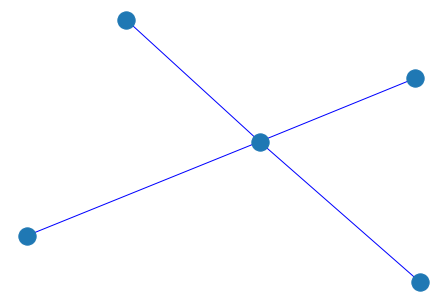

MST size: 12.0
done


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#     0    1    2    3    4    5    6    7    8    9
# 0 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
# 1 ['0', '1', '1', '0', '0', '0', '1', '0', '0', '0']
# 2 ['0', '0', '0', '0', '0', '0', '1', '0', '0', '0']
# 3 ['0', '0', '0', '1', '1', '0', '1', '0', '0', '0']
# 4 ['0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
# 5 ['0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
# 6 ['0', '0', '0', '1', '1', '0', '0', '0', '0', '0']
# 7 ['0', '0', '1', '0', '0', '0', '0', '0', '0', '0']
# 8 ['0', '0', '1', '0', '0', '0', '0', '1', '1', '1']
# 9 ['0', '0', '1', '0', '0', '0', '0', '0', '0', '0']

class IslandProject():

    def __init__(self, m, n):
        self.m = m
        self.n = n
        self.weighted_adjacency_list = None
        self.mst = None

    def load_file(self, file_name) -> list:
        '''load file to an array line by line
        Parameters:
        file_name (str): text file with x,y pairs in m x n layout
        Returns:
        list:all lines in m x n
        '''

        rv = []
        with open(file_name) as f:
            line = list(f.readline().strip())
            while line:
                rv.append(line)
                line = list(f.readline().strip())

        self.contents = rv
        self.land_cell_list = self.find_land_cells()
        return self.contents
    
    def print_pretty(self, d):
        for i in range(len(d)):
            print(d[i])

    def find_land_cells(self) -> list:
        '''returns the points that have land markers
        if the point has a land marker return it

        :returns: list of numbers

        :rtype: int
        '''
        rv = []
        for r, i in enumerate(range(self.n)):
            for c, j in enumerate(range(self.m)):
                if self.contents[i][j] == '1':
                    rv.append([i, j])

        self.land_cell_list = rv
        return self.land_cell_list

    def coordinate_to_number(self, i, j):
        """ takes a coordinate (i, j) and"""
        """maps it to a unique number t in [0, mn − 1]"""
        """"which is then returned by the function."""
        rv = i * self.n + j
        return rv

    def number_to_coordinate(self, t):
        i = t // self.n
        j = t % self.n
        return i, j

    def distance(self, t1, t2):
        i1, j1 = self.number_to_coordinate(t1)
        i2, j2 = self.number_to_coordinate(t2)

        rv = abs(i1 - i2) + abs(j1 - j2)
        return rv

    def generate_neighbors_from_t(self, t1) -> list:
        x, y = self.number_to_coordinate(t1)
        r1, r2 = self.generate_neighbors(x, y)
        return r1

    def generate_neighbors(self, x, y) -> list:
        """should return number of neighbors for the item"""
        """ can be 0, 2, 3, 4 """
        result = []
        result_coord = []
        # this 'mess' finds the items on outside of the x,y
        for r, c in [(x, y + j)
                     for j in (-1, 0, 1)  # cols left/right
                     if j != 0]:

            if [r, c] in self.land_cell_list:
                rv = self.coordinate_to_number(r, c)
                result.append(rv)
                result_coord.append(self.number_to_coordinate(rv))

        for r, c in [(x + i, y)
                     for i in (-1, 0, 1)  # rows over/under
                     if i != 0]:

            if [r, c] in self.land_cell_list:
                rv = self.coordinate_to_number(r, c)
                result.append(rv)
                result_coord.append(self.number_to_coordinate(rv))

        return result, result_coord

    def explore_island(self, t1) -> list:
        data = []
        rv = self._explore_helper(t1, data)
        return rv

    def _explore_helper(self, t1, data):
        '''uses recursion to find all the neighbors
            along with the linked neighbors'''
        if t1 not in data:
            data.append(t1)
            # print('t1 to get neighbors: {}'.format(t1))
            z = self.generate_neighbors_from_t(t1)
            # print('z: {}'.format(z))
            for f in z:
                # print('f_all: {}'.format(f))
                data = self._explore_helper(f, data)
        else:
            # print(' t1 already done: {}'.format(t1))
            pass
        return data

    def find_islands(self) -> list:
        """reads in list of land cells
            outputs list of islands -
            islands are sub lists"""
        visited = []  # t1 numbers that DO not need to be done
        islands = []  # the [[t1, t2], [t3]] format.
        for i in self.land_cell_list:
            t1 = self.coordinate_to_number(i[0], i[1])
            if t1 not in visited:
                c = self.explore_island(t1)
                islands.append(c)
                for d in c:  # here we want to NOT revisit these places.
                    if d not in visited:
                        visited.append(d)

        return islands

    def island_distance(self, isl1, isl2):
        min_distance = 9999
        for i in isl1:
            for j in isl2:
                min_distance = min(self.distance(i, j), min_distance)
        
        return min_distance

    def island_graph(self):
        '''return a list of island to island and distance
           between each'''

        graph = []
        islands = self.find_islands()
        for i, isl1 in enumerate(islands):
            for j, _ in enumerate(islands, start=i + 1):  # enumerte start-dumb
                if j == len(islands):
                    break

                isl2 = islands[j]
                i_distance = self.island_distance(isl1, isl2)
                graph.append([i, j, i_distance])

        self.weighted_adjacency_list = graph
        return graph

    def generate_mst(self):
        import networkx as nx
        if self.weighted_adjacency_list is None:
            self.island_graph()

        G = nx.Graph()  # nx.cycle_graph(4)  # nx.Graph()
        for i in self.weighted_adjacency_list:
            G.add_edge(i[0], i[1], weight=i[2])

        T = nx.minimum_spanning_tree(G)
        self.mst = T
        return T

    def get_mst_size(self):
        if self.mst is None:
            self.generate_mst()

        return self.mst.size(weight='weight')

    def draw_graph(self):
        import networkx as nx
        import matplotlib.pyplot as plt
        if self.mst is None:
            self.generate_mst()

        # nx.draw(self.mst)
        nx.draw(self.mst,  nodecolor='r', edge_color='b')
        plt.show()


if __name__ == '__main__':
    import os
    import pathlib
    #cur_dir = pathlib.Path(__file__).parent.absolute()
    file_name = 'shawn-cicoria.txt'

    m, n = 10, 10
    p = IslandProject(m, n)
    contents = p.load_file(file_name)
    land_cell_list = p.find_land_cells()

    print('file contents: \n')
    p.print_pretty(contents)
    
    print('\nland points: \n')
    p.print_pretty(land_cell_list)

    p.draw_graph()
    
    print('MST size: {}'.format(p.get_mst_size()))

    print('done')






> Note: the following might not run in the notebook. the actual files are located at the following locations:

- full gist:   https://gist.github.com/cicorias/e19acd2bf941d1953c78f1734738add2
- m1.py: - https://gist.githubusercontent.com/cicorias/e19acd2bf941d1953c78f1734738add2/raw/33ee61c9434d32e5c64c3e79a39c8312508084d4/m1.py
- test_m1.py: - https://gist.githubusercontent.com/cicorias/e19acd2bf941d1953c78f1734738add2/raw/33ee61c9434d32e5c64c3e79a39c8312508084d4/test_m1.py

........................

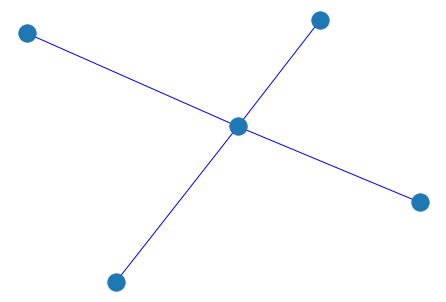

...
----------------------------------------------------------------------
Ran 27 tests in 0.157s

OK


In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import unittest
import os
import pathlib

# from m1 import IslandProject


class m1_part_1(unittest.TestCase):
    def setUp(self):
        cur_dir ='.' #pathlib.Path(__file__).parent.absolute()
        file_name = os.path.join(cur_dir, 'shawn-cicoria.txt')
        self.p = IslandProject(3, 5)
        self.contents = self.p.load_file(file_name)

    def test_one(self):
        self.assertGreater(len(self.contents), 0, 'file has contents')

    def test_coord_to_number1(self):
        n = self.p.coordinate_to_number(0, 0)
        self.assertEqual(n, 0, '[0,0] is at 0')

    def test_coord_to_number_0_5(self):
        n = self.p.coordinate_to_number(0, 4)
        self.assertEqual(n, 4, '[0,4] is at 4')

    def test_coord_to_number_1_0(self):
        n = self.p.coordinate_to_number(1, 0)
        self.assertEqual(n, 5, '[1,0] is at 5')

    def test_coord_to_number_1_1(self):
        n = self.p.coordinate_to_number(1, 1)
        self.assertEqual(n, 6, '[1,1] is at 6')

    def test_coord_to_number_2_1(self):
        n = self.p.coordinate_to_number(2, 1)
        self.assertEqual(n, 11, '[2,1] is at 11')

    def test_coord_to_number_2_4(self):
        n = self.p.coordinate_to_number(2, 4)
        self.assertEqual(n, 14, '[2, 4] is at 14')

    def test_number_to_coord_14(self):
        tv = 14
        i, j = self.p.number_to_coordinate(tv)
        self.assertEqual([i, j], [2, 4], '{} begets 2,4'.format(tv))

    def test_number_to_coord_11(self):
        tv = 11
        i, j = self.p.number_to_coordinate(tv)
        self.assertEqual([i, j], [2, 1], '{} begets 2,1'.format(tv))


class m1_part_2(unittest.TestCase):
    def setUp(self):
        self.p = IslandProject(3, 5)

    def test_distance_1(self):
        t1 = self.p.coordinate_to_number(0, 0)
        t2 = self.p.coordinate_to_number(0, 1)
        d = 1

        rv = self.p.distance(t1, t2)
        self.assertEqual(d, rv, 'incorrect distance')

    def test_distance_2(self):
        t1 = self.p.coordinate_to_number(0, 0)
        t2 = self.p.coordinate_to_number(1, 1)
        d = 2

        rv = self.p.distance(t1, t2)
        self.assertEqual(d, rv, 'incorrect distance')


class m2_part_1(unittest.TestCase):
    def setUp(self):
        m, n = 10, 10
        self.p = IslandProject(m, n)
        cur_dir = '.' #pathlib.Path(__file__).parent.absolute()
        self.file_name = os.path.join(cur_dir, 'shawn-cicoria.txt')
        self.contents = self.p.load_file(self.file_name)
        self.land_cell_list = self.p.find_land_cells()

    def test_find_neighbor_1(self):
        """should return number of neighbors for the item"""
        a1 = self.p.coordinate_to_number(1, 2)
        r2, _ = self.p.generate_neighbors(1, 1)

        self.assertIn(a1, r2, 'did not find neighbor')

    def test_find_neighbor_2(self):
        """should return number of neighbors for the item"""
        a1 = self.p.coordinate_to_number(2, 6)
        r2, _ = self.p.generate_neighbors(1, 6)

        self.assertIn(a1, r2, 'did not find neighbor')

    def test_find_neighbor_3(self):
        """should return number of neighbors for the item"""
        a1 = self.p.coordinate_to_number(1, 6)
        a2 = self.p.coordinate_to_number(3, 6)
        r2, _ = self.p.generate_neighbors(2, 6)

        self.assertIn(a1, r2, 'a1 did not find neighbor')
        self.assertIn(a2, r2, 'a2 did not find neighbor')

    def test_find_neighbor_4(self):
        """should return number of neighbors for the item"""
        a1 = self.p.coordinate_to_number(8, 8)
        r2, _ = self.p.generate_neighbors(8, 9)

        self.assertIn(a1, r2, 'a1 did not find neighbor')

    def test_find_neighbor_7_2(self):
        """should return number of neighbors for the item"""
        a1 = self.p.coordinate_to_number(8, 2)
        # a2 = self.p.coordinate_to_number(9, 2)
        a3 = self.p.coordinate_to_number(6, 3)
        r2, _ = self.p.generate_neighbors(7, 2)

        self.assertIn(a1, r2, 'a1 did not find neighbor')
        # self.assertIn(a2, r2, 'a2 did not find neighbor')
        self.assertNotIn(a3, r2, 'a3 FOUND and should not be neighbor')
        # print(r2)


class m2_part_4(unittest.TestCase):
    def setUp(self):
        m, n = 10, 10
        self.p = IslandProject(m, n)
        cur_dir = '.' # pathlib.Path(__file__).parent.absolute()
        self.file_name = os.path.join(cur_dir, 'shawn-cicoria.txt')
        self.contents = self.p.load_file(self.file_name)
        self.land_cell_list = self.p.find_land_cells()

    def test_explore_island_1(self):
        expected = sorted([43, 33, 34, 63, 53, 64])
        t1 = self.p.coordinate_to_number(4, 3)
        rv = self.p.explore_island(t1)
        self.assertIsNotNone(rv)
        # print(rv)
        self.assertListEqual(sorted(rv), expected, 'explore island difference')
        # for i in rv:
        #     print(i)
        #     x, y = self.p.number_to_coordinate(i)
        #     print('\n [{}, {}]'.format(x, y))

    def test_explore_island_2(self):
        expected = sorted([72, 82, 92])
        t1 = self.p.coordinate_to_number(7, 2)
        rv = self.p.explore_island(t1)
        self.assertIsNotNone(rv)
        # print(rv)
        self.assertListEqual(sorted(rv), expected, 'explore island difference')
        # for i in rv:
        #     print(i)
        #     x, y = self.p.number_to_coordinate(i)
        #     print('\n [{}, {}]'.format(x, y))


class m2_part_5(unittest.TestCase):
    def setUp(self):
        m, n = 3, 3
        self.p = IslandProject(m, n)
        cur_dir = '.' #pathlib.Path(__file__).parent.absolute()
        self.file_name = os.path.join(cur_dir, 'shawn-cicoria_3x3.txt')
        self.contents = self.p.load_file(self.file_name)

        m, n = 10, 10
        self.p2 = IslandProject(m, n)
        self.file_name2 = os.path.join(cur_dir, 'shawn-cicoria.txt')
        self.contents2 = self.p2.load_file(self.file_name2)

#     0    1    2    3    4    5    6    7    8    9
# 0 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
# 1 ['0', '1', '1', '0', '0', '0', '1', '0', '0', '0']
# 2 ['0', '0', '0', '0', '0', '0', '1', '0', '0', '0']
# 3 ['0', '0', '0', '1', '1', '0', '1', '0', '0', '0']
# 4 ['0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
# 5 ['0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
# 6 ['0', '0', '0', '1', '1', '0', '0', '0', '0', '0']
# 7 ['0', '0', '1', '0', '0', '0', '0', '0', '0', '0']
# 8 ['0', '0', '1', '0', '0', '0', '0', '1', '1', '1']
# 9 ['0', '0', '1', '0', '0', '0', '0', '0', '0', '0']

    def test_find_islands_1(self):
        exp = [[4, 5]]
        islands = self.p.find_islands()
        # print(islands)
        self.assertListEqual(exp, islands)

    def test_find_islands_10(self):
        exp = [[11, 12], [16, 26, 36], [33, 34, 43, 53, 63, 64], [72, 82, 92],
               [87, 88, 89]]
        islands = self.p2.find_islands()
        # print(islands)
        self.assertListEqual(exp, islands)


class m3_part_1(unittest.TestCase):
    def setUp(self):
        m, n = 3, 3
        self.p = IslandProject(m, n)
        cur_dir = '.' # pathlib.Path(__file__).parent.absolute()
        self.file_name = os.path.join(cur_dir, 'shawn-cicoria_3x3.txt')
        self.contents = self.p.load_file(self.file_name)

        m, n = 10, 10
        self.p2 = IslandProject(m, n)
        self.file_name2 = os.path.join(cur_dir, 'shawn-cicoria.txt')
        self.contents2 = self.p2.load_file(self.file_name2)

    def test_island_distance_1(self):
        isl1, isl2 = [11, 12], [16, 26, 36]

        rv = self.p2.island_distance(isl1, isl2)

        self.assertEqual(4, rv, 'distance is invalid')

    def test_island_distance_2(self):
        isl1, isl2 = [11, 12], [33, 34, 43, 53, 63, 64]

        rv = self.p2.island_distance(isl1, isl2)

        self.assertEqual(3, rv, 'distance is invalid')

    def test_island_distance_3(self):
        isl1, isl2 = [11, 12], [87, 88, 89]

        rv = self.p2.island_distance(isl1, isl2)

        self.assertEqual(12, rv, 'distance is invalid')

    def test_island_distance_4(self):
        isl1, isl2 = [72, 82, 92], [87, 88, 89]

        rv = self.p2.island_distance(isl1, isl2)

        self.assertEqual(5, rv, 'distance is invalid')


class m3_part_2(unittest.TestCase):
    def setUp(self):
        m, n = 3, 3
        self.p = IslandProject(m, n)
        cur_dir = '.' # pathlib.Path(__file__).parent.absolute()
        self.file_name = os.path.join(cur_dir, 'shawn-cicoria_3x3.txt')
        self.contents = self.p.load_file(self.file_name)

        m, n = 10, 10
        self.p2 = IslandProject(m, n)
        self.file_name2 = os.path.join(cur_dir, 'shawn-cicoria.txt')
        self.contents2 = self.p2.load_file(self.file_name2)

    def test_island_graph_1(self):
        rv = self.p2.island_graph()
        expected = [[0, 1, 4], [0, 2, 3], [0, 3, 6], [0, 4, 12],
                    [1, 2, 2], [1, 3, 8], [1, 4, 6],
                    [2, 3, 2], [2, 4, 5],
                    [3, 4, 5]]

        self.assertListEqual(expected, rv, 'bad graph')

    def test_generate_mst(self):
        self.p2.generate_mst()
        self.p2.draw_graph()
        # print(graph)

    def test_get_mst_size_1(self):
        s = self.p2.get_mst_size()
        self.assertEqual(s, 12, 'mst wrong size')


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    # unittest.main(verbosity=1)
